# Detecção de irregularidade em processo seletivo com Python
#### *04 de fevereiro de 2022*
#### *Por Hélber Borges*

<img src="https://marshalsseg.com.br/wp-content/uploads/2021/04/o-que-investigacao-de-riscos-e-fraudes-corporativas-investigacao-empresarial.jpg" width="650"/>

### 1. Descrição Geral do Problema

Muitas vezes o uso de estatística e de Machine Leaning podem ser de grande valia no setor público. Esse estudo vem mostrar como as ferramentas disponíveis em Python podem ajudar na busca de indícios de irregularidades em processos seletivos e concursos, dentre outros.
Embora esta análise não seja uma prova definitiva da manipulação de um concurso, pode fornecer importantes insights que ajudarão a selecionar o que deve ou não ser investigado com mais profundidade.
Neste projeto iremos analisar as estatísticas das notas de um processo seletivo realizado para a contratação de estagiário para um órgão público, que consiste em duas etapas específicas, sendo uma delas objetiva e outra subjetiva.
A primeira etapa consiste em uma redação em que foram avaliados os conhecimentos sobre o tema, domínio da lingua culta, dentre outros e a nota varia entre 0 e 50.
A segunda etapa consiste em uma entrevista realizada presencialmente com os candidatos e a nota também varia entre 0 e 50. A nota total é resultado da soma das duas etapas.
Foram excluídos da tabela os candidatos desclassificados na primeira fase, isto é, aqueles que não participaram da entrevista.

<b>Objetivo:</b> Utilizar a linguagem <b>Python</b> para realizar análises estatísticas sobre a distribuição das notas e obter insights acerca de possíveis manipulações no resultado, além de <b>Machine Learning</b> para agrupar os candidatos em diferentes clusters. 

<b>Hipótese inicial:</b> A hipótese inicial é que as notas nas diferentes etapas tendem a ser positivamente correlacionadas, isto é, altos valores em uma etapa tendem a se repetir na outra, uma vez que espera-se que os candidatos com maior nota tenham se preparado mais que os candidatos com menor nota. Espera-se, também, que a distribuição das notas apresente um padrão aleatório porém convergente a uma distribuição uniforme discreta com valores levemente convergentes em torno da média.

<b>Disclaimer:</b> O objetivo deste estudo é mostrar a utilidade daq implementação de técnicas de estatística e ML em Python, não sendo utilizadas como provas ou evidências em qualquer investigação judicial, servindo somente para fins de estudo. Não há divulgação de nomes de indivíduos ou quaisquer informações que possam associar a um processo seletivo ocorrido no mundo real e, deste modo, as informações não devem ser utilizadas como tal.


### 2. Carregando  e tratando dados

##### 2.1 Importando bibliotecas necessárias

Iniciamos o projeto importando todas as bibliotecas necessárias para a realização das fases iniciais de exploração e transformação dos dados.

In [5]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

#### 2.2 Carregando dados

O primeiro passo é importar a planilha excel contendo os dados das notas da 'Redação', da 'Entrevista' e 'Total'.

In [27]:
#importar dados

notas = pd.read_excel("Dados.xlsx")

#analisar dados
notas.head()
display(notas)

,Redação,Entrevista,Total
0,30.0,10.0,40.0
1,32.5,20.0,52.5
2,32.5,20.0,52.5
3,32.5,20.0,52.5
4,35.0,20.0,55.0
5,37.5,20.0,57.5
6,30.0,30.0,60.0
7,32.5,30.0,62.5
8,37.5,30.0,67.5
9,40.0,30.0,70.0


#### 2.3 Avaliando a base importada

O próximo passo tem como objetivo mostrar o formato dos dados e se existe algum valor nulo. Nota-se que todos os dados são do tipo float e não há células com valores NaN. 

Deste modo, não será necessária nenhuma adequação na base de dados.

In [7]:
print(notas.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Redação     29 non-null     float64
 1   Entrevista  29 non-null     float64
 2   Total       29 non-null     float64
dtypes: float64(3)
memory usage: 824.0 bytes
None


### 3. Estatísticas

#### 3.1 Estatística descritiva

Abaixo serão descritas as estatísticas básicas dos dados. As estatísticas são:
- MEAN: média dos valores da variável
- STD: Desvio-padrão da variável. O desvio-padrão é uma medida de dispersão, ou seja, mostra o quanto os dados variam em torno da média. Quanto menos uniformes os dados, maior o desvio-padrão.
- MIN: Valor mínimo observado em cada variável.
- 25%: Valor do primeiro quartil.
- 50%: Valor do segundo quartil.
- 75%: Valor do terceiro quartil.
- Max: Valor máximo observado em cada variável.

Uma informação salta aos olhos em uma primeira análise: o desvio-padrão da variável 'Redação' é muito inferior ao da variável 'Entrevista'. Nos próximos passos avaliaremos a dispersão com maior detalhamento.


In [8]:
notas.describe()

,Redação,Entrevista,Total
count,29.000000,29.000000,29.000000
mean,37.758621,32.068966,69.827586
std,5.359605,9.235727,10.772216
min,30.000000,10.000000,40.000000
25%,32.500000,30.000000,62.500000
50%,37.500000,30.000000,75.000000
75%,42.500000,35.000000,77.500000
max,47.500000,50.000000,80.000000


#### 3.2 Análise exploratória

A partir desta etapa utilizaremos de análises e métodos disponíveis no Python. Começaremos plotando um boxplot que avalia a variaçãao das notas das entrevistas com base nas notas das redações.

Percebe-se aqui que, à medida que as notas da redação são maiores os resultados são menores e menos dispersos. Por outro lado, as menores notas na redação tendem a ter uma variação  maior e também os melhores resultados.

> Aqui cabe um primeiro questionamento a um resultado contraintuitivo. Por que os candidatos com maiores notas na redação necessariamente obtiveram notas baixas na entrevista?  Ao mesmo tempo, por que os candidatos com menores notas obtiveram maior variação nas mesmas e atingiram as notas mais altas na entrevista? Estas perguntas mostram indicadores da tendência dos dados e deverão ser respondidas com outras análises.

<AxesSubplot:xlabel='Redação', ylabel='Entrevista'>

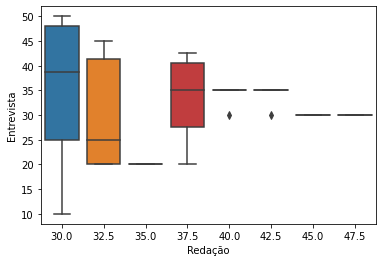

In [9]:
#variação dos dados em função da nota da redação - etapa 1
sns.boxplot(x=notas['Redação'], y=notas['Entrevista'])



#### 3.2.1 Distribuição das notas por etapa

Para responder ao questionamento acima, uma primeira providência pode ser entender a distribuição das notas dos candidatos em cada etapa. Observa-se, ao plotar a frequência de distribuição das notas da redação, que as notas foram distribuídas de maneira aparentemente aleatória, com uma densidade de distribuição parecida entre 30 e 50 pontos, tendendo a figurar como uma <b> distribuição uniforme discreta</b>.

>A Uniforme discreta é a distribuição de n resultados diferentes, mas igualmente prováveis. É a contrapartida da distribuição uniforme no espaço discreto. Toma como entrada apenas N, o número de resultados distintos.

<img src="https://miro.medium.com/max/588/1*BqHSs8bG47d136MqoYlL9w.png">


C:\Users\henri\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Redação', ylabel='Density'>

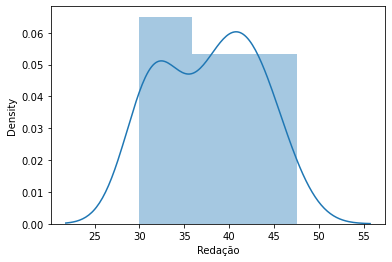

In [10]:
#histogramas
sns.distplot(notas['Redação'])


Avaliada a distribuição as notas da Etapa 1 (Redação), avaliaremos o comportamento das notas da Etapa 2 (Entrevista). Percebe-se claramente que a distribuição desta é muito diferente daquela. Aqui nota-se uma predominância das notas em torno de 30 com distribuição que aparenta a uma distribuição gaussiana.

>A distribuição gaussiana (ou normal) é uma das distribuições de probabilidade mais utilizadas para modelar fenômenos naturais. Isso se deve ao fato de que um grande número de fenômenos naturais apresenta sua distribuição de probabilidade tão proximamente normal, que a ela pode ser com sucesso referida, e, portanto, com adequado acerto por ela representada como se normal fosse. A distribuição normal é ligada a vários conceitos matemáticos como movimento browniano, ruído branco, entre outros. Em termos mais formais, a distribuição normal é uma distribuição de probabilidade absolutamente contínua parametrizada pela sua esperança matemática e desvio padrão.

C:\Users\henri\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Entrevista', ylabel='Density'>

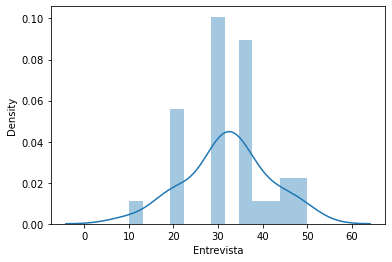

In [11]:
sns.distplot(notas['Entrevista'])


#### 3.2.2 Correlação dos dados

O próximo passo da investigação é a análise da correlação dos dados como um todo e de trechos especificamente selecionados do mesmo.

>Correlação, dependência ou associação é qualquer relação estatística (causal ou não causal) entre duas variáveis e correlação é qualquer relação dentro de uma ampla classe de relações estatísticas que envolva dependência entre duas variáveis.
>A correlação pode assumir valores que oscilam entre -1 e 1, passando por 0, sendo que o valor -1 indica que o par de variáveis é correlacionado negativamente de forma perfeita (ou seja, o aumento do valor de uma variável implica necessariamente a redução em mesmo nível de outra) e o valor 1 indica que as varáveis são perfeitamente relacionadas (o aumento de uma variável implica no aumento em mesmo nível em outra variável), conforme mostram figuras abaixo:

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Correlation100.png"> <img src="https://upload.wikimedia.org/wikipedia/commons/8/82/Correlation077.png"> <img src="https://upload.wikimedia.org/wikipedia/commons/e/ed/Correlation000.png"> 

A fins de avaliar uma possível interferência nas notas do seletivo, a correlação será avaliada em 3 grupos distintos:

* Todos os dados
* Os 10 alunos com menor nota total (p1)
* Os 10 alunos com maior nota total (p2)

Em um ambiente onde não houvesse interferência no resultado final seria esperado que a correlação dos dados mantivesse o mesmo padrão independente do grupo de dados, um fato que não ocorreu. 
No grupo de todas as notas foi observado que a redação e a entrevista tem correlação positiva com a nota total, porém a correlação da nota da entrevista é significativamente maior que a nota da redação. Já a correlação entre a redação e a entrevista é próxima de 0 (ou seja, aproximadamente nula).

<AxesSubplot:>

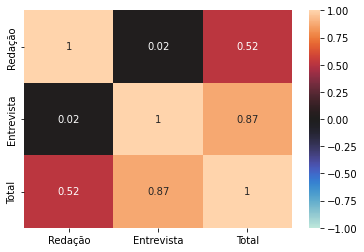

In [12]:
#correlação
#dividindo dados superiores e inferiores em partes baseados na nota final

p1 = notas.loc[0:10]
p2 = notas.loc[18:28]


matriz_corr = notas.corr()
sns.heatmap(matriz_corr, annot=True, vmin=-1, vmax=1, center=0)

Já no caso onde são analisadas as menores notas, percebe-se que tanto a redação quanto a entrevista têm um resultado positivamente relacionado com a nota total, de forma forte. Especificamente, a nota da entrevista tem uma correlação próxima a 1, ou seja, tem uma correlação quase que perfeita com o resultado final. 

>Uma possível causa da correlação quase perfeita entre a entrevista e a nota total pode ser causada pela manipulação de dados da redação a fim de AUMENTAR a nota dos piores classificados. Isoladamente, não se pode concluir isso. Para tanto, deve-se avaliar o comportamento das maiores notas. Caso ocorra uma correlação negativa (ou seja, as notas dos melhores candidatos sejam manipuladas pra baixo a fim de DIMINUIR sua classificação) os indícios de manipulação se tornam quase irrefutáveis.

<AxesSubplot:>

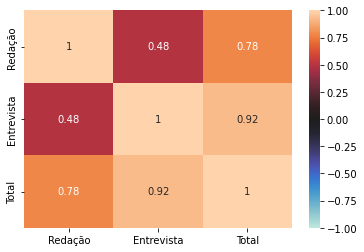

In [13]:
matriz_cp1 = p1.corr()
sns.heatmap(matriz_cp1, annot=True, vmin=-1, vmax=1, center=0)

No caso em que são analisadas as maiores notas notam-se resultados totalmente opostos e que reforçam os indícios de manipulação dos resultados. Percebe-se que a correlação entre as notas da entrevista e da redação é de -0.99, ou seja quase que negativamente correlacionada. Isso é um resultado bastante diferente do observado nas outras bases e pode ser explicado pela redução proposital das notas dos melhores colocados e aumento da nota de um candidato mal posicionado na redação.
Percebe-se também que há uma correlação negativa entre a nota da redação e a nota total, algo não esperado, uma vez que a nota total é dada pela soma do resultado da redação e da entrevista.
Já a correlação da nota da entrevista com a nota final foi positiva, como esperado.

>Embora nenhum dos indicadores acima avaliados prove individualmente a manipulação dos resultados, o comportamento de todos eles como um todo apresentam fortes evidências da manipulação do resultado. Não se pode cogitar que o resultado tenha surgido naturalmente, sem nenhuma interferência nas notas da entrevista. A partir desse momento já se indica uma investigação de forma a coletar as provas jurídicas que comprovem a manipulação dos resultados, com grandes probabilidades de serem encontradas.

<AxesSubplot:>

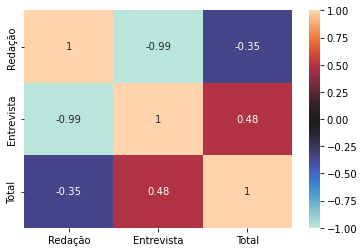

In [14]:
matriz_cp2 = p2.corr()
sns.heatmap(matriz_cp2, annot=True, vmin=-1, vmax=1, center=0)

#### 3.2.3 Assimetria (Skewness)

Outra medida particularmente útil para a corroboração dos resultados é a de assimetria (skewness). Em Estatística, a assimetria, também conhecida como obliquidade (em Inglês "skewness") é uma medida da falta de simetria de uma determinada distribuição de frequência.
A obliquidade mede a assimetria das caudas da distribuição. Distribuições assimétricas que tem uma cauda mais "pesada" que a outra apresentam obliquidade. Distribuições simétricas tem obliquidade zero. Assim:

* Se v>0, então a distribuição tem uma cauda direita (valores acima da média) mais pesada
* Se v<0, então a distribuição tem uma cauda esquerda (valores abaixo da média) mais pesada
* Se v=0, então a distribuição é aproximadamente simétrica (na terceira potência do desvio em relação à média).

Abaixo observa-se que a assimetria das notas de redação é próxima de 0, ou seja, a distribuição dos dados é aproximadamente simétrica. Já a assimetria das notas da entrevista são também próximas de 0, mas mais negativa que a da redação, possuindo uma cauda esquerda mais pesada.

In [15]:
#Medidas de assimetria

assimetria_red = notas['Redação'].skew()
assimetria_entr = notas['Entrevista'].skew()

print('Assimetria(Skewness)',assimetria_red)
print('Assimetria(Skewness)',assimetria_entr)


Assimetria(Skewness) -0.02713611130583685
Assimetria(Skewness) -0.1956786985209926


### 4 Agrupamento com Machine Learning

Machine Learning (ML ou Aprendizado de Máquina) é um método de análise de dados que automatiza a construção de modelos analíticos. É um ramo da inteligência artificial baseado na ideia de que sistemas podem aprender com dados, identificar padrões e tomar decisões com o mínimo de intervenção humana.
Existem atualmente diversos algoritmos de ML disponíveis. Estes podem ser usados com diversos propósitos, tais como:
* Classificação
* Regressão
* Clusterização (Agrupamento), dentre outros.

No case atual, será utilizado um modelo de clusterização bastante versátil, o KMeans, que é é um algoritmo de clusterização (ou agrupamento) disponível na biblioteca Scikit-Learn.
É um algoritmo de aprendizado não supervisionado (ou seja, que não precisa de inputs de confirmação externos) que avalia e clusteriza os dados de acordo com suas características. Alguns dos exemplos de uso do KMeans:
* Definição de locais para instalação de centros logísticos em função de lojas;
* Clientes com comportamentos semelhantes;
* Usuários de determinada rede social e seus influenciadores.

Como mostrado acima, o KMeans será útil para agruparmos os participantes do processo seletivo em diferentes clusters. Estes clusters podem ajudar a identificar quais são os indivíduos que possivelmente tiveram suas notas aumentadas e quais deles tiveram suas notas diminuídas.

Para tanto, o primeiro passo é definir o número de grupos que deverão ser feitos. Isso não é feito por escolha do programador, mas sim por meio do método de Elbow.

>"O método Elbow se trata de uma técnica interessante para encontrar o valor ideal do parâmetro k. Basicamente o que o método faz é testar a variância dos dados em relação ao número de clusters. É considerado um valor ideal de k quando o aumento no número de clusters não representa um valor significativo de ganho."

Abaixo são testados os dados com base no método Elbow. Percebe-se que há ganho significativo até o 5o cluster e pouco ganho em mais clusters. Desse modo, definiremos 5 diferentes padrões para o modelo KMEans.

C:\Users\henri\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 6441.810344827585
2 2132.66369047619
3 1093.8541666666663
4 708.9285714285713
5 448.92857142857156
6 343.48214285714283
7 224.37499999999997
8 155.625
9 111.875


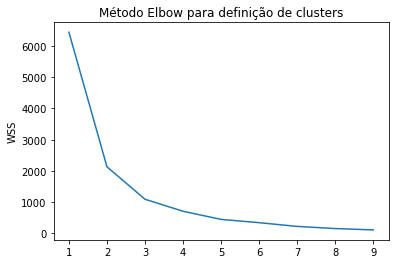

In [17]:
#definindo o número de clusters

wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init='random')
    kmeans.fit(notas)
    print(i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('Método Elbow para definição de clusters')
plt.ylabel('WSS')
plt.show()

Feito isso, rodaremos o algoritmo KMeans, que fará até 500 diferentes iterações (ou seja, rodará até 500 vezes o modelo para ajustar e selecionar os melhores pontos).
O resultado final é o mostrado abaixo. Os 5 grupos definidos estão separados por cores e os pontos em vermelho são os centroides utilizado para o agrupamento dos dados. 

Chamam especial atenção o grupo cujas notas da entrevista estão entre 40 e 50 e o grupo mais à direita, cujas notas da redação estão entre 40 e 50. Os demais grupos não possuem muita discrepância entre as notas e possivelmente não foram alvo de manipulação.
No primeiro grupo citado encontram-se os candidatos que ficaram empatados em primeiro lugar (números 27 e 28 no dataset), além dos candidatos n. 18, 19, 20 e 21. Já no segundo grupo citado encontram-se os candidatos que ocupam as posições 9, 10, 11, 12, 13, 14, 15, 16, 17, 22, 23, 24, 25 e 26 do dataset, 5 deles (22, 23, 24, 25 e 26) empatados em segundo lugar. Sugere-se que busque evidências de manipulação nos dados ligados a estes indivíduos, especialmente nas notas da entrevista.

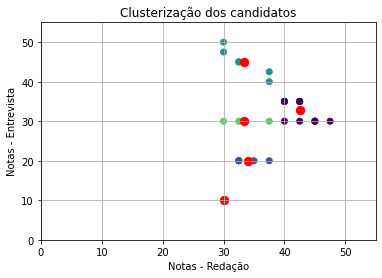

In [18]:


kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 500)

pred_y = kmeans.fit_predict(notas)

plt.scatter(notas["Redação"], notas["Entrevista"], c = pred_y)

plt.title('Clusterização dos candidatos')
plt.xlabel('Notas - Redação')
plt.ylabel('Notas - Entrevista')
plt.xlim(0, 55)
plt.ylim(0, 55)
plt.grid()

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 70, c = 'red')
plt.show()
            

### Conclusões:

As técnicas acima utilizadas mostraram-se de grande valia para uma análise inicial de detecção de irregularidades em um processo seletivo. Por meio de análise estatística descritiva foi possível encontrar dados com comportamentos distintos no que se refere a distribuição, tendência, correlação e assimetria. 
Esses dados por si só apresentaram importantes evidências de que os candidatos mais bem-posicionados na etapa 1 tiveram suas notas manipuladas para baixo, de modo a permitir que candidatos com baixo desempenho na etapa 1 fossem bem-avaliados na etapa 2 e selecionados nesse processo.
A hipótese inicial não se confirmou para todos os dados, especialmente nos primeiros selecionados, o que reforça uma possível interferência na nota desses indivíduos. 
Já o algoritmo KMeans de Machine Learning se mostrou uma ótima ferramenta para a avaliação de quais candidatos foram alvo de possíveis interferências, de modo a guiar uma futura investigação e facilitar a busca de provas. 
